# OPERACIÓN 01: Crea y entrena una red neuronal con Python y TensorFlow

## Paso 1: Instalación de TensorFlow

Para trabajar con redes neuronales, el documento sugiere instalar TensorFlow, una
biblioteca de código abierto desarrollada por Google. Si tienes un entorno Python
instalado, puedes ejecutar el siguiente comando en tu terminal:

In [13]:
#!pip install "tensorflow<2.11"
import tensorflow as tf
import sys
# Comfirmar que todo este instalado
print("Versión de Python:", sys.version)
print("TensorFlow:", tf.__version__)
print("GPU disponible:", tf.config.list_physical_devices('GPU'))

Versión de Python: 3.9.23 (main, Jun  5 2025, 13:25:08) [MSC v.1929 64 bit (AMD64)]
TensorFlow: 2.10.1
GPU disponible: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Paso 2: Cargar y Explorar el Conjunto de Datos Fashion MNIST

Eldataset Fashion MNIST, incluido en Keras, es una colección de imágenes de ropa
divididas en categorías como camisetas, pantalones y abrigos.

4422102/4422102 [==============================] - 1s 0us/step


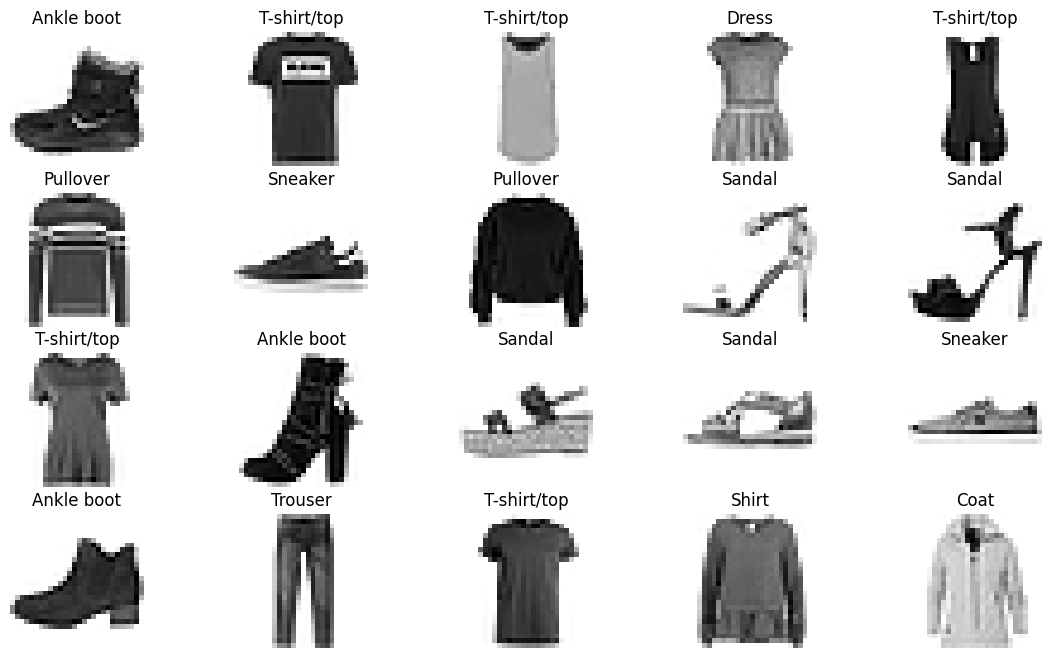

In [ ]:
# Importamos las bibliotecas necesarias
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
# Cargar el dataset Fashion MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# Explorar el dataset
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker",
"Bag", "Ankle boot"]
plt.figure(figsize=(14, 8))
for i in range(20):
 plt.subplot(4, 5, i+1)
 plt.imshow(X_train[i], cmap="binary")
 plt.title(labels[y_train[i]])
 plt.axis("off")
plt.show()

## Paso 3: Normalización de Datos

Para mejorar el rendimiento de la red, es importante normalizar los datos, escalando los
valores de píxeles (0-255) a un rango entre 0 y 1:

In [3]:
# Normalizar los datos
X_train, X_test = X_train / 255.0, X_test / 255.0

## Paso 4: Definición de la Arquitectura de la Red Neuronal

Se usará una red neuronal con tres capas:
* Una capa Flatten que convierte la imagen de 28x28 píxeles en un vector de 784
entradas.
* Una capa oculta Dense con 128 neuronas y la función de activación relu.
* Una capa de salida Dense con 10 neuronas y la función de activación softmax para
clasificar cada prenda en una de las 10 categorías.

In [4]:
from tensorflow import keras
# Definimos la arquitectura de la red neuronal
model = keras.Sequential([
 keras.layers.Flatten(input_shape=(28, 28)),
 keras.layers.Dense(128, activation='relu'),
 keras.layers.Dense(10, activation='softmax')
])

## Paso 5: Compilar el Modelo

Para entrenar la red, es necesario compilar el modelo especificando la función de
pérdida, el optimizador y las métricas de evaluación:

In [5]:
# Compilar el modelo
model.compile(
 optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
)

## Paso 6: Entrenar el Modelo
Configura los parámetros de entrenamiento. Entrenaremos el modelo por 10 épocas
usando el conjunto de datos de entrenamiento y validación:

In [6]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 3ms/step - loss: 0.4990 - accuracy: 0.8245 - val_loss: 0.4395 - val_accuracy: 0.8425
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3775 - accuracy: 0.8640 - val_loss: 0.3897 - val_accuracy: 0.8536
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3375 - accuracy: 0.8770 - val_loss: 0.3719 - val_accuracy: 0.8703
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3123 - accuracy: 0.8862 - val_loss: 0.3715 - val_accuracy: 0.8702
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2969 - accuracy: 0.8894 - val_loss: 0.3963 - val_accuracy: 0.8583
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2808 - accuracy: 0.8972 - val_loss: 0.3473 - val_accuracy: 0.8750
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2688 - accuracy: 0.8994 - val_loss: 0.3370 - val_accuracy

## Paso 7: Evaluar el Modelo

Finalmente, evalúa el modelo en el conjunto de prueba para obtener la precisión del
modelo:

In [7]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nPrecisión en el conjunto de prueba:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3429 - accuracy: 0.8767

Precisión en el conjunto de prueba: 0.8766999840736389


# OPERACIÓN 02: Implementa y gráfica regresión lineal simple.

Para evaluar cómo las ventas de una tienda de ropa pueden depender de la temperatura
(ejemplo ficticio), se implementará una regresión lineal simple para ver si existe una
correlación entre estas dos variables.

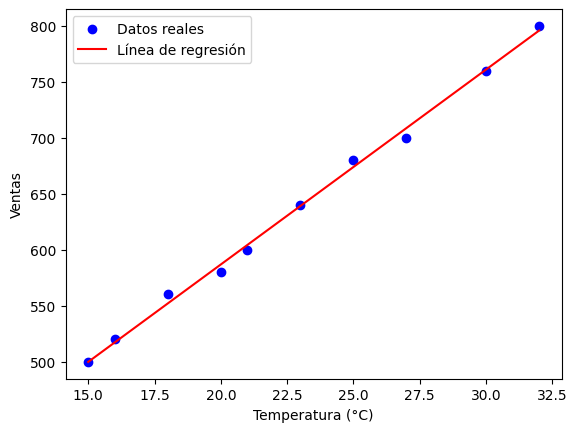

Coeficiente de determinación: 0.9996659605670523


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Datos de ejemplo (ficticios)
temperatura = np.array([15, 16, 18, 20, 21, 23, 25, 27, 30, 32])
ventas = np.array([500, 520, 560, 580, 600, 640, 680, 700, 760, 800])
# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(temperatura.reshape(-1, 1), ventas,
test_size=0.2, random_state=42)
# Creamos y entrenamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)
# Predicciones y gráfica de resultados
plt.scatter(temperatura, ventas, color="blue", label="Datos reales")
plt.plot(temperatura, model.predict(temperatura.reshape(-1, 1)), color="red", label="Línea de regresión")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Ventas")
plt.legend()
plt.show()
# Evaluación del modelo
r_sq = model.score(X_test, y_test)
print('Coeficiente de determinación:', r_sq)

Donde la línea roja representa el modelo de regresión lineal ajustado a los datos reales,
que están indicados con puntos azules.